In [1]:
import os
import sys
os.chdir('/data/projects/seongsu/RIS/CGFormer')

In [2]:
import lmdb
import pyarrow as pa
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
lmdb_path = 'data/lmdb/refcocog_u/test.lmdb'

In [4]:
lmdb_env = lmdb.open(
    lmdb_path, subdir=False, max_readers=32,
    readonly=True, lock=False,
    readahead=False, meminit=False
)

In [23]:
def loads_pyarrow(buf):
    """
    Args:
        buf: the output of `dumps`.
    """
    
    return pa.deserialize(buf)

with lmdb_env.begin(write=False) as txn:
    length = loads_pyarrow(txn.get(b'__len__'))
    keys = loads_pyarrow(txn.get(b'__keys__'))

In [7]:
index = 0
with lmdb_env.begin(write=False) as txn:
    byteflow = txn.get(keys[index])
ref = loads_pyarrow(byteflow)
# img
ori_img = cv2.imdecode(np.frombuffer(ref['img'], np.uint8),
                       cv2.IMREAD_COLOR)
img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2RGB)
img_size = img.shape[:2]


In [8]:
ref

{'img': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe2\x0cXICC_PROFILE\x00\x01\x01\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-HP  \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11cprt\x00\x00\x01P\x00\x00\x003desc\x00\x00\x01\x84\x00\x00\x00lwtpt\x00\x00\x01\xf0\x00\x00\x00\x14bkpt\x00\x00\x02\x04\x00\x00\x00\x14rXYZ\x00\x00\x02\x18\x00\x00\x00\x14gXYZ\x00\x00\x02,\x00\x00\x00\x14bXYZ\x00\x00\x02@\x00\x00\x00\x14dmnd\x00\x00\x02T\x00\x00\x00pdmdd\x00\x00\x02\xc4\x00\x00\x00\x88vued\x00\x00\x03L\x00\x00\x00\x86view\x00\x00\x03\xd4\x00\x00\x00$lumi\x00\x00\x03\xf8\x00\x00\x00\x14meas\x00\x00\x04\x0c\x00\x00\x00$tech\x00\x00\x040\x00\x00\x00\x0crTRC\x00\x00

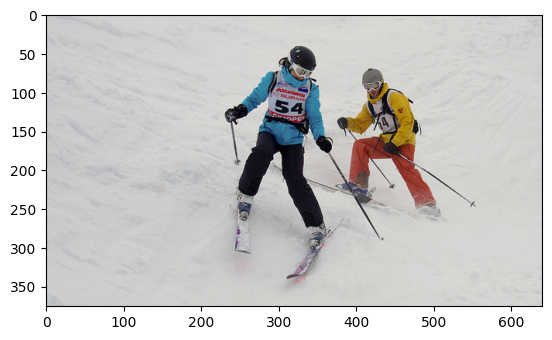

In [16]:
plt.imshow(img)
plt.show()

In [19]:
ref.keys()

dict_keys(['img', 'mask', 'cat', 'seg_id', 'img_name', 'num_sents', 'sents'])

In [20]:
mask_path = '/home/seongsu/RIS/CGFormer/data/masks/refcocog_u'
# mask
seg_id = ref['seg_id']
mask_dir = os.path.join(mask_path, str(seg_id) + '.png')

In [21]:
mask = cv2.imdecode(np.frombuffer(ref['mask'], np.uint8),
                    cv2.IMREAD_GRAYSCALE)
mask = mask / 255.

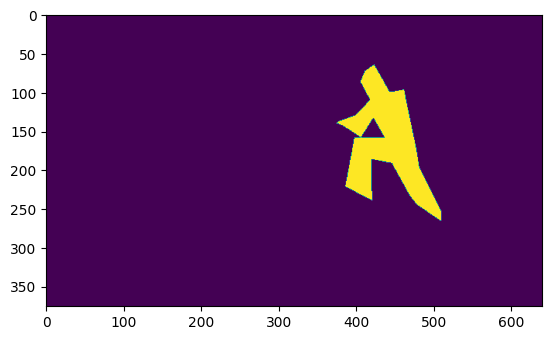

In [23]:
plt.imshow(mask)
plt.show()

In [22]:
len(keys)

3

In [26]:
num_bgs = 4
keys = list(np.random.choice(keys_lmdb, size=num_bgs-1, replace=False))
refs = []
for key in keys:
    with lmdb_env.begin(write=False) as txn:
        byteflow = txn.get(key)
    ref_other = loads_pyarrow(byteflow)
    refs.append(ref_other)

In [27]:
mode = 'train'
imgs, masks, sents, seg_ids = [], [], [], []
for ref in refs:
    ori_img = cv2.imdecode(np.frombuffer(ref['img'], np.uint8),
                        cv2.IMREAD_COLOR)
    img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2RGB)
    imgs.append(img)

    mask = cv2.imdecode(np.frombuffer(ref['mask'], np.uint8),
            cv2.IMREAD_GRAYSCALE)
    mask = mask / 255.
    masks.append(mask)

    seg_id = ref['seg_id']
    seg_ids.append(seg_id)

    idx = np.random.choice(ref['num_sents'])
    if mode == 'train':
        sent = ref['sents'][idx]
        sents.append(sent)

In [28]:
import matplotlib.pyplot as plt

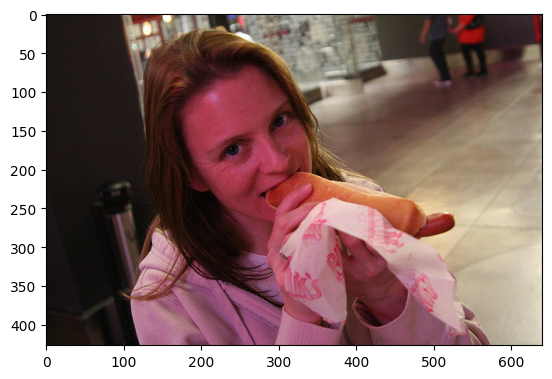

In [30]:
plt.imshow(imgs[0])
plt.show()

In [31]:
sents

['a woman eating a hot dog',
 'a man wearing a orange tie',
 'a baseball catcher wearing a red vest with red shin guards']